In [1]:

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#from datetime import datetime

from google.colab import files
uploader= files.upload()


Saving substation_data_Ch.csv to substation_data_Ch.csv


In [2]:
df = pd.read_csv('substation_data_Ch.csv')
print(df.head())


            timestamp  demand_kw   voltage_a   voltage_b   voltage_c  \
0  2008-01-01 0:00:00   1.568400  241.158188  240.686236  240.496311   
1  2008-01-01 0:15:00   1.562400  240.252448  240.833280  240.283343   
2  2008-01-01 0:30:00   1.679867  242.296127  241.743477  242.627606   
3  2008-01-01 0:45:00   1.577067  243.643363  242.619517  242.787405   
4  2008-01-01 1:00:00   1.632267  240.375298  240.942674  241.069061   

   temperature_celsius  humidity_percent  
0                  5.5              94.0  
1                  5.5              94.0  
2                  5.5              94.0  
3                  5.5              94.0  
4                  5.4              94.0  


In [3]:
train_dates = pd.to_datetime(df['timestamp'])
print(train_dates.tail(15))

for col in df.columns:
    df[col]= df[col].fillna(method='ffill').fillna(method='bfill')
print(df.head())

35121   2008-12-31 20:15:00
35122   2008-12-31 20:30:00
35123   2008-12-31 20:45:00
35124   2008-12-31 21:00:00
35125   2008-12-31 21:15:00
35126   2008-12-31 21:30:00
35127   2008-12-31 21:45:00
35128   2008-12-31 22:00:00
35129   2008-12-31 22:15:00
35130   2008-12-31 22:30:00
35131   2008-12-31 22:45:00
35132   2008-12-31 23:00:00
35133   2008-12-31 23:15:00
35134   2008-12-31 23:30:00
35135   2008-12-31 23:45:00
Name: timestamp, dtype: datetime64[ns]
            timestamp  demand_kw   voltage_a   voltage_b   voltage_c  \
0  2008-01-01 0:00:00   1.568400  241.158188  240.686236  240.496311   
1  2008-01-01 0:15:00   1.562400  240.252448  240.833280  240.283343   
2  2008-01-01 0:30:00   1.679867  242.296127  241.743477  242.627606   
3  2008-01-01 0:45:00   1.577067  243.643363  242.619517  242.787405   
4  2008-01-01 1:00:00   1.632267  240.375298  240.942674  241.069061   

   temperature_celsius  humidity_percent  
0                  5.5              94.0  
1                  5.5

/tmp/ipython-input-3-1042394697.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col]= df[col].fillna(method='ffill').fillna(method='bfill')


In [4]:
df['votage_mean']= df[['voltage_a','voltage_b','voltage_c']].mean(axis=1)
df.drop(['voltage_a','voltage_b','voltage_c'], axis=1, inplace=True)
print(df.head())

            timestamp  demand_kw  temperature_celsius  humidity_percent  \
0  2008-01-01 0:00:00   1.568400                  5.5              94.0   
1  2008-01-01 0:15:00   1.562400                  5.5              94.0   
2  2008-01-01 0:30:00   1.679867                  5.5              94.0   
3  2008-01-01 0:45:00   1.577067                  5.5              94.0   
4  2008-01-01 1:00:00   1.632267                  5.4              94.0   

   votage_mean  
0   240.780245  
1   240.456357  
2   242.222403  
3   243.016762  
4   240.795677  


In [5]:
cols = list(df)[1:5]
print(cols)
df_for_training = df[cols].astype(float)


['demand_kw', 'temperature_celsius', 'humidity_percent', 'votage_mean']


In [6]:

# df_for_plot=df_for_training.tail(5000)
# df_for_plot.plot.line()

scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)
print(df.head())


            timestamp  demand_kw  temperature_celsius  humidity_percent  \
0  2008-01-01 0:00:00   1.568400                  5.5              94.0   
1  2008-01-01 0:15:00   1.562400                  5.5              94.0   
2  2008-01-01 0:30:00   1.679867                  5.5              94.0   
3  2008-01-01 0:45:00   1.577067                  5.5              94.0   
4  2008-01-01 1:00:00   1.632267                  5.4              94.0   

   votage_mean  
0   240.780245  
1   240.456357  
2   242.222403  
3   243.016762  
4   240.795677  


In [7]:
trainX = []
trainY = []

n_future = 96
n_past = 14*96

for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    # trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])
    trainY.append(df_for_training_scaled[i:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))


trainX shape == (33697, 1344, 4).
trainY shape == (33697, 96).


In [ ]:
# model = Sequential()
# model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(trainX.shape[1], trainX.shape[2])))
# model.add(LSTM(32, activation='relu', return_sequences=False))
# model.add(Dropout(0.2))
# model.add(Dense(trainY.shape[1]))  #  == 96
# model.compile(optimizer='adam', loss='mse')
# model.summary()
# history = model.fit(trainX, trainY, epochs=5, batch_size=16, validation_split=0.1, verbose=1)

# plt.plot(history.history['loss'], label='Training loss')
# plt.plot(history.history['val_loss'], label='Validation loss')
# plt.legend()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_3 (Bidirectional) │ (None, 1344, 128)      │        35,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 1344, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 32)             │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 96)             │         3,168 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,616 (232.88 KB)

 Trainable params: 59,360 (231.88 KB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/25
1896/1896 ━━━━━━━━━━━━━━━━━━━━ 188s 97ms/step - loss: 0.8090 - val_loss: 0.9475
Epoch 2/25
1896/1896 ━━━━━━━━━━━━━━━━━━━━ 199s 96ms/step - loss: 0.8034 - val_loss: 0.9526
Epoch 3/25
1896/1896 ━━━━━━━━━━━━━━━━━━━━ 203s 96ms/step - loss: 0.6791 - val_loss: 1.0063
Epoch 4/25
1896/1896 ━━━━━━━━━━━━━━━━━━━━ 199s 95ms/step - loss: 0.6530 - val_loss: 1.0280
Epoch 5/25
1896/1896 ━━━━━━━━━━━━━━━━━━━━ 200s 94ms/step - loss: 0.6170 - val_loss: 0.9448
Epoch 6/25
1896/1896 ━━━━━━━━━━━━━━━━━━━━ 204s 95ms/step - loss: 0.5825 - val_loss: 0.9264
Epoch 7/25
1896/1896 ━━━━━━━━━━━━━━━━━━━━ 202s 95ms/step - loss: 0.5835 - val_loss: 0.9557
Epoch 8/25
1896/1896 ━━━━━━━━━━━━━━━━━━━━ 180s 95ms/step - loss: 0.5298 - val_loss: 0.9461
Epoch 9/25
1896/1896 ━━━━━━━━━━━━━━━━━━━━ 206s 97ms/step - loss: 0.5382 - val_loss: 0.9339
Epoch 10/25
1896/1896 ━━━━━━━━━━━━━━━━━━━━ 204s 98ms/step - loss: 0.5091 - val_loss: 0.9294
Epoch 11/25
1896/1896 ━━━━━━━━━━━━━━━━━━━━ 179s 95ms/step - loss: 0.4853 - val_loss: 0.93

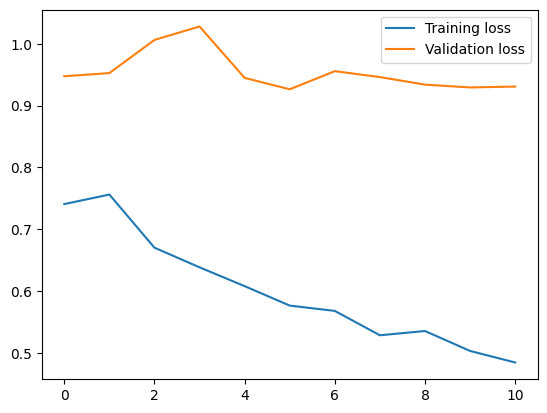

In [17]:
from tensorflow.keras.layers import BatchNormalization, Bidirectional

model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(BatchNormalization())
model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(trainY.shape[1]))  # multi-step output
model.compile(optimizer='adam', loss='mse')
model.summary()
# history = model.fit(trainX, trainY, epochs=15, batch_size=16, validation_split=0.1, verbose=1)

from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(trainX, trainY, epochs=25, batch_size=16,
                    validation_split=0.1, callbacks=[early_stop], verbose=1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()


/tmp/ipython-input-22-3859683487.py:7: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  predict_period_dates = pd.date_range(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


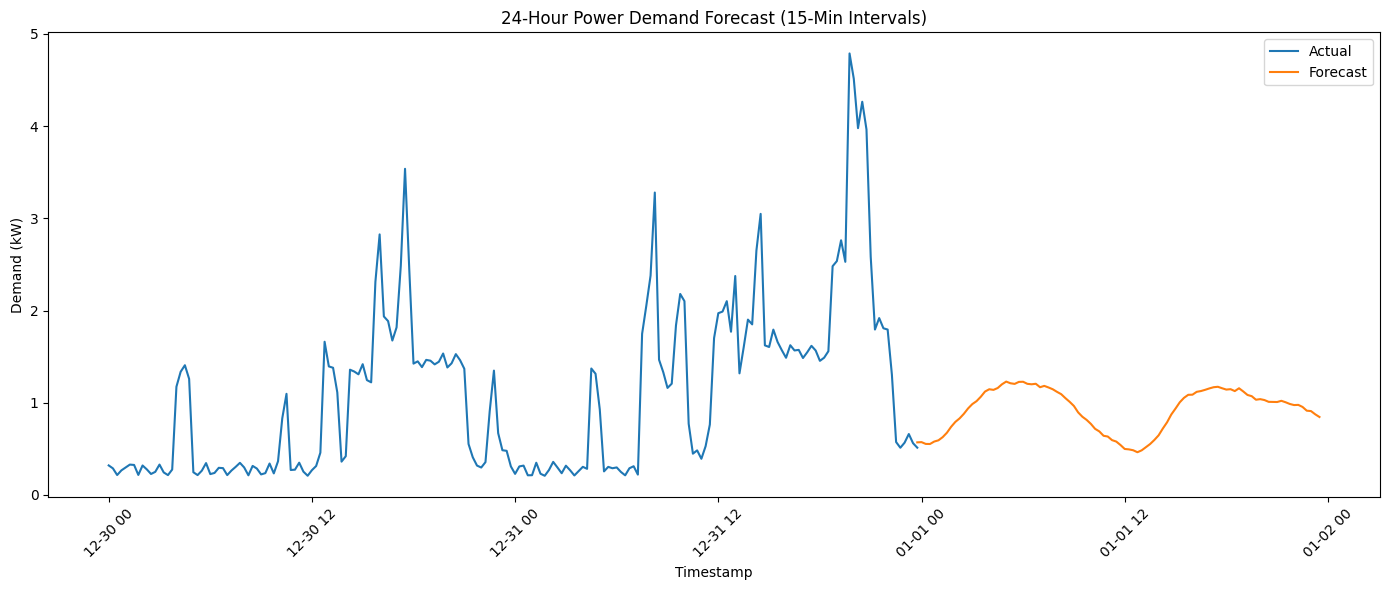

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

last_time = pd.to_datetime(df['timestamp'].iloc[-1])
predict_period_dates = pd.date_range(
    start=last_time, #+ pd.Timedelta(minutes=15),
    periods=96,
    freq='15T'
)
prediction = model.predict(trainX[-1].reshape(1, trainX.shape[1], trainX.shape[2]))

prediction_T = prediction.reshape(-1, 1)
prediction_copies = np.repeat(prediction_T, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:, 0]

df_forecast = pd.DataFrame({
    'timestamp': predict_period_dates,
    'demand_kw': y_pred_future
})
import matplotlib.pyplot as plt
import seaborn as sns

df['timestamp'] = pd.to_datetime(df['timestamp'])
df_forecast['timestamp'] = pd.to_datetime(df_forecast['timestamp'])

recent_actual = df[['timestamp', 'demand_kw']].tail(192)

plt.figure(figsize=(14,6))
sns.lineplot(x='timestamp', y='demand_kw', data=recent_actual, label='Actual')
sns.lineplot(x='timestamp', y='demand_kw', data=df_forecast, label='Forecast')

plt.title("24-Hour Power Demand Forecast (15-Min Intervals)")
plt.xlabel("Timestamp")
plt.ylabel("Demand (kW)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()
